### * Import required libraries for model building

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
def DisplayConfusionMatrix(actual, prediction):
    cm = confusion_matrix(actual, prediction)
    cm_dspl = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_dspl.plot(cmap='YlGnBu')
    plt.title('Confusion Matrix')
    plt.show()

### * Import the test, train split data

In [3]:
xtrain = pd.read_csv('xtrain.csv')
xtest = pd.read_csv('xtest.csv')
ytrain = pd.read_csv('ytrain.csv')
ytest = pd.read_csv('ytest.csv')
xtrain.shape, xtest.shape,  ytrain.shape, ytest.shape

((228910, 165), (97828, 165), (228910, 1), (97828, 1))

In [4]:
xtrain = xtrain.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
xtest = xtest.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
y_train = np.array(ytrain.DEP_DEL15)
y_test = np.array(ytest.DEP_DEL15)

### * Base model building

In [5]:
lr = LogisticRegression(max_iter=900)
model = lr.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [6]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.5028
Testing accuracy 0.4940


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49     48914
           1       0.49      0.49      0.49     48914

    accuracy                           0.49     97828
   macro avg       0.49      0.49      0.49     97828
weighted avg       0.49      0.49      0.49     97828



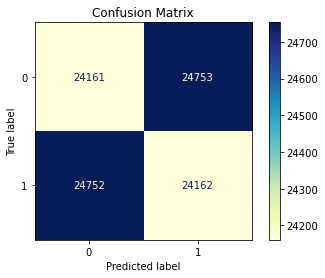

In [8]:
DisplayConfusionMatrix(y_test, y_pred)

In [9]:
rf = RandomForestClassifier()
model = rf.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [10]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 1.0000
Testing accuracy 0.8558


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     48914
           1       0.99      0.72      0.83     48914

    accuracy                           0.86     97828
   macro avg       0.88      0.86      0.85     97828
weighted avg       0.88      0.86      0.85     97828



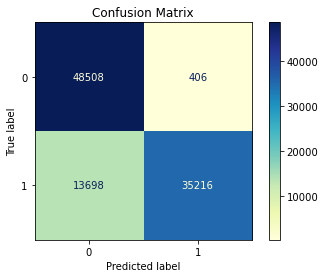

In [12]:
DisplayConfusionMatrix(y_test, y_pred)

### * Ensemble techniques

In [13]:
nb = BernoulliNB()
model = nb.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [14]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8580
Testing accuracy 0.8580


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     48914
           1       0.93      0.77      0.84     48914

    accuracy                           0.86     97828
   macro avg       0.87      0.86      0.86     97828
weighted avg       0.87      0.86      0.86     97828



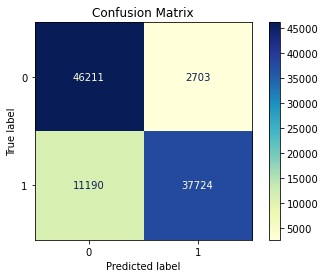

In [16]:
DisplayConfusionMatrix(y_test, y_pred)

In [17]:
gnb = GaussianNB()
model = gnb.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [18]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.5471
Testing accuracy 0.5449


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44     48914
           1       0.53      0.73      0.62     48914

    accuracy                           0.54     97828
   macro avg       0.55      0.54      0.53     97828
weighted avg       0.55      0.54      0.53     97828



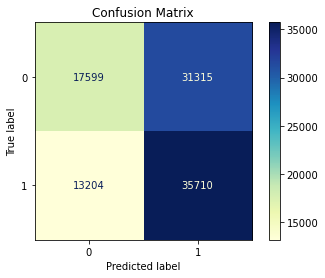

In [20]:
DisplayConfusionMatrix(y_test, y_pred)

In [21]:
kn = KNeighborsClassifier()
model = kn.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [22]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8306
Testing accuracy 0.5057


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55     48914
           1       0.51      0.42      0.46     48914

    accuracy                           0.51     97828
   macro avg       0.51      0.51      0.50     97828
weighted avg       0.51      0.51      0.50     97828



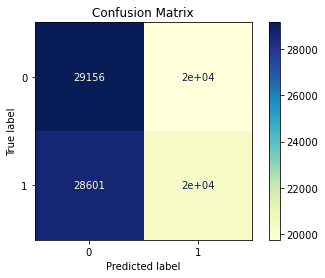

In [24]:
DisplayConfusionMatrix(y_test, y_pred)

In [25]:
dt = DecisionTreeClassifier()
model = dt.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [26]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 1.0000
Testing accuracy 0.7609


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76     48914
           1       0.77      0.75      0.76     48914

    accuracy                           0.76     97828
   macro avg       0.76      0.76      0.76     97828
weighted avg       0.76      0.76      0.76     97828



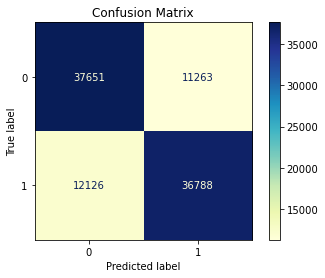

In [28]:
DisplayConfusionMatrix(y_test, y_pred)

In [29]:
lgbm = LGBMClassifier()
model = lgbm.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [30]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8831
Testing accuracy 0.8808


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     48914
           1       0.99      0.77      0.87     48914

    accuracy                           0.88     97828
   macro avg       0.90      0.88      0.88     97828
weighted avg       0.90      0.88      0.88     97828



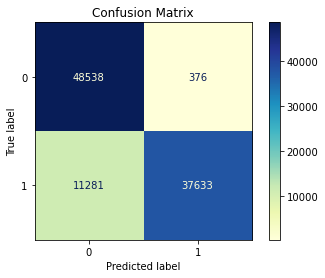

In [32]:
DisplayConfusionMatrix(y_test, y_pred)

In [33]:
xgc = XGBClassifier()
model = xgc.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [34]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8860
Testing accuracy 0.8754


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     48914
           1       0.97      0.77      0.86     48914

    accuracy                           0.88     97828
   macro avg       0.89      0.88      0.87     97828
weighted avg       0.89      0.88      0.87     97828



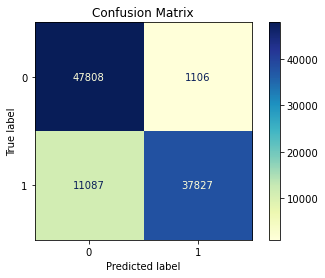

In [36]:
DisplayConfusionMatrix(y_test, y_pred)

### * From the above ensemble techniques we can infer that:
* Logestic Regression is best fit base model
* top 3 models from ensemble methods are 
    a) LGBM classifier
    b)XGBoost classifier
    c) Bernoulli Naive-Bayes Classifier

In [37]:
x1 = sm.add_constant(xtrain)
rf = sm.Logit(y_train, x1).fit()

         Current function value: 0.406328
         Iterations: 35


### * we now use P-value to determine the significant variables

In [ ]:
pvalue = rf.pvalues
pval = pd.DataFrame(pvalue)
signi = pval[pval[0] < 0.05].index
signi = signi[1:]
xtrain = xtrain[signi]
xtest = xtest[signi]

In [39]:
signi, len(signi)

(Index(['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
        'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
        'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
        'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'TMAX',
        ...
        'PREVIOUS_AIRPORT_REGION_texas', 'PREVIOUS_AIRPORT_REGION_uthah',
        'PREVIOUS_AIRPORT_REGION_vermont', 'PREVIOUS_AIRPORT_REGION_virginia',
        'PREVIOUS_AIRPORT_REGION_washington',
        'PREVIOUS_AIRPORT_REGION_west_virginia',
        'PREVIOUS_AIRPORT_REGION_wisconsin', 'PREVIOUS_AIRPORT_REGION_wyoming',
        'DISTANCE_GROUP', 'SEGMENT_NUMBER'],
       dtype='object', length=155),
 155)

In [40]:
x1 = sm.add_constant(xtrain)
rf = sm.Logit(y_train, x1).fit()

         Current function value: 0.354726
         Iterations: 35


In [41]:
pvalue = rf.pvalues
pval = pd.DataFrame(pvalue)
signi = pval[pval[0] < 0.05].index
signi = signi[1:]
xtrain = xtrain[signi]
xtest = xtest[signi]

In [42]:
signi, len(signi)

(Index(['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
        'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
        'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
        'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'TMAX',
        ...
        'PREVIOUS_AIRPORT_REGION_texas', 'PREVIOUS_AIRPORT_REGION_uthah',
        'PREVIOUS_AIRPORT_REGION_vermont', 'PREVIOUS_AIRPORT_REGION_virginia',
        'PREVIOUS_AIRPORT_REGION_washington',
        'PREVIOUS_AIRPORT_REGION_west_virginia',
        'PREVIOUS_AIRPORT_REGION_wisconsin', 'PREVIOUS_AIRPORT_REGION_wyoming',
        'DISTANCE_GROUP', 'SEGMENT_NUMBER'],
       dtype='object', length=155),
 155)

In [43]:
x1 = sm.add_constant(xtrain)
rf = sm.Logit(y_train, x1).fit()

         Current function value: 0.354726
         Iterations: 35


In [44]:
pvalue = rf.pvalues
pval = pd.DataFrame(pvalue)
signi = pval[pval[0] < 0.05].index
signi = signi[1:]
xtrain = xtrain[signi]
xtest = xtest[signi]

In [45]:
signi, len(signi)

(Index(['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
        'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
        'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
        'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'TMAX',
        ...
        'PREVIOUS_AIRPORT_REGION_texas', 'PREVIOUS_AIRPORT_REGION_uthah',
        'PREVIOUS_AIRPORT_REGION_vermont', 'PREVIOUS_AIRPORT_REGION_virginia',
        'PREVIOUS_AIRPORT_REGION_washington',
        'PREVIOUS_AIRPORT_REGION_west_virginia',
        'PREVIOUS_AIRPORT_REGION_wisconsin', 'PREVIOUS_AIRPORT_REGION_wyoming',
        'DISTANCE_GROUP', 'SEGMENT_NUMBER'],
       dtype='object', length=155),
 155)

### * We now have 155 significant variables out of 165 varibales
### * We now use these significant variables to re build the model and check if the model is able to predict better.

In [46]:
lr = LogisticRegression(max_iter=900)
model = lr.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [47]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.5028
Testing accuracy 0.4940


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49     48914
           1       0.49      0.49      0.49     48914

    accuracy                           0.49     97828
   macro avg       0.49      0.49      0.49     97828
weighted avg       0.49      0.49      0.49     97828



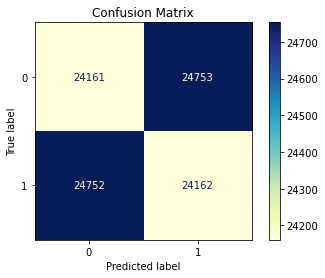

In [49]:
DisplayConfusionMatrix(y_test, y_pred)

### * Ensemble techniques

In [50]:
rf = RandomForestClassifier()
model = rf.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [51]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 1.0000
Testing accuracy 0.8589


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88     48914
           1       0.99      0.72      0.84     48914

    accuracy                           0.86     97828
   macro avg       0.89      0.86      0.86     97828
weighted avg       0.89      0.86      0.86     97828



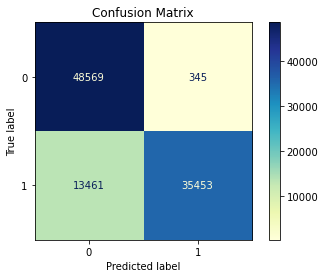

In [53]:
DisplayConfusionMatrix(y_test, y_pred)

In [54]:
nb = BernoulliNB()
model = nb.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [55]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8562
Testing accuracy 0.8566


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     48914
           1       0.93      0.77      0.84     48914

    accuracy                           0.86     97828
   macro avg       0.87      0.86      0.86     97828
weighted avg       0.87      0.86      0.86     97828



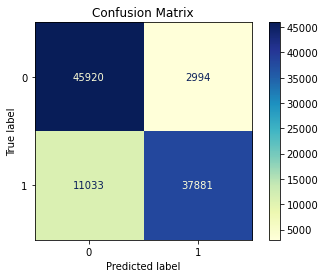

In [57]:
DisplayConfusionMatrix(y_test, y_pred)

In [58]:
gnb = GaussianNB()
model = gnb.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [59]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.5472
Testing accuracy 0.5451


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44     48914
           1       0.53      0.73      0.62     48914

    accuracy                           0.55     97828
   macro avg       0.55      0.55      0.53     97828
weighted avg       0.55      0.55      0.53     97828



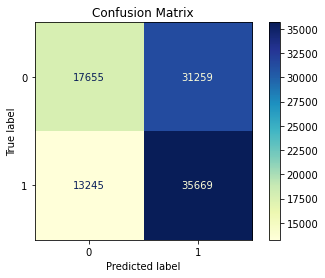

In [61]:
DisplayConfusionMatrix(y_test, y_pred)

In [62]:
kn = KNeighborsClassifier()
model = kn.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [63]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8306
Testing accuracy 0.5057


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55     48914
           1       0.51      0.42      0.46     48914

    accuracy                           0.51     97828
   macro avg       0.51      0.51      0.50     97828
weighted avg       0.51      0.51      0.50     97828



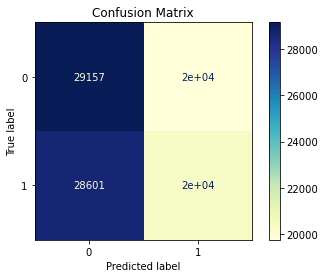

In [65]:
DisplayConfusionMatrix(y_test, y_pred)

In [66]:
dt = DecisionTreeClassifier()
model = dt.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [67]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 1.0000
Testing accuracy 0.7726


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     48914
           1       0.78      0.77      0.77     48914

    accuracy                           0.77     97828
   macro avg       0.77      0.77      0.77     97828
weighted avg       0.77      0.77      0.77     97828



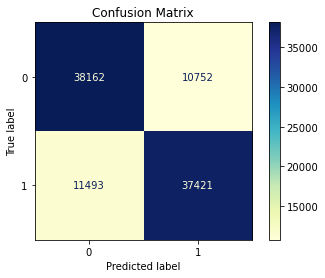

In [69]:
DisplayConfusionMatrix(y_test, y_pred)

In [70]:
lgbm = LGBMClassifier()
model = lgbm.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [71]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8822
Testing accuracy 0.8795


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     48914
           1       0.99      0.77      0.86     48914

    accuracy                           0.88     97828
   macro avg       0.90      0.88      0.88     97828
weighted avg       0.90      0.88      0.88     97828



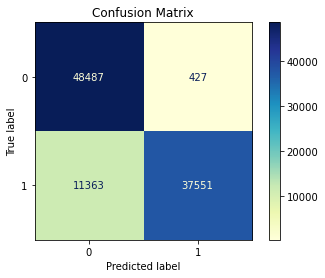

In [73]:
DisplayConfusionMatrix(y_test, y_pred)

In [74]:
xgc = XGBClassifier()
model = xgc.fit(xtrain, y_train)
y_pred = model.predict(xtest)

In [75]:
print('Training accuracy {:.4f}'.format(model.score(xtrain, y_train)))
print('Testing accuracy {:.4f}'.format(model.score(xtest, y_test)))

Training accuracy 0.8841
Testing accuracy 0.8742


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     48914
           1       0.97      0.77      0.86     48914

    accuracy                           0.87     97828
   macro avg       0.89      0.87      0.87     97828
weighted avg       0.89      0.87      0.87     97828



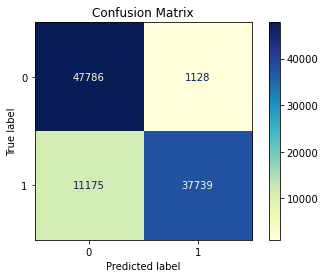

In [77]:
DisplayConfusionMatrix(y_test, y_pred)

### * We can see that top 3 models which were derived from these ensemble techniques there is no significant improvement hence we will do hyper-parameter tuning to get better insisghts from the data.